<a href="https://colab.research.google.com/github/gr1nick/lab_bigData/blob/master/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задание 2. Реализовать в виде набора функций алгоритм k-means и алгоритм
иерархической кластеризации (например, с использованием функции linkage модуля
scipy.cluster) для разделения набора данных без меток на кластеры.

Задание 3. Построить кривую зависимости интеркластерного расстояния от
числа кластеров для алгоритма иерархической кластеризации, выбрать оптимальный
порог разделения.

Задание 4. Сравнить результаты двух выбранных алгоритмов по выбранной
метрики оценки качества кластеризации.

In [ ]:
from tensorflow.keras.datasets import mnist

# Загрузка данных MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Мы будем работать с тестовым набором данных
images = test_images


Преобразование и нормализация данных
Для алгоритма k-means и иерархической кластеризации нам нужно преобразовать каждое изображение из 2D в 1D формат, чтобы получить вектор признаков. Также рекомендуется нормализовать данные.

In [ ]:
# Преобразование изображений из 2D в 1D
num_pixels = images.shape[1] * images.shape[2]
images = images.reshape((images.shape[0], num_pixels)).astype('float32')

# Нормализация данных к диапазону 0-1
images /= 255


Реализация K-means
Реализуем базовую версию алгоритма k-means. Мы будем использовать KMeans из sklearn.cluster.

In [ ]:
from sklearn.cluster import KMeans

# Определение модели KMeans
num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters, n_init=10)

# Подгонка модели на данных
kmeans.fit(images)

labels = kmeans.labels_


Визуализация результатов K-means
Чтобы понять, как работает кластеризация, мы можем визуализировать центроиды кластеров как изображения.

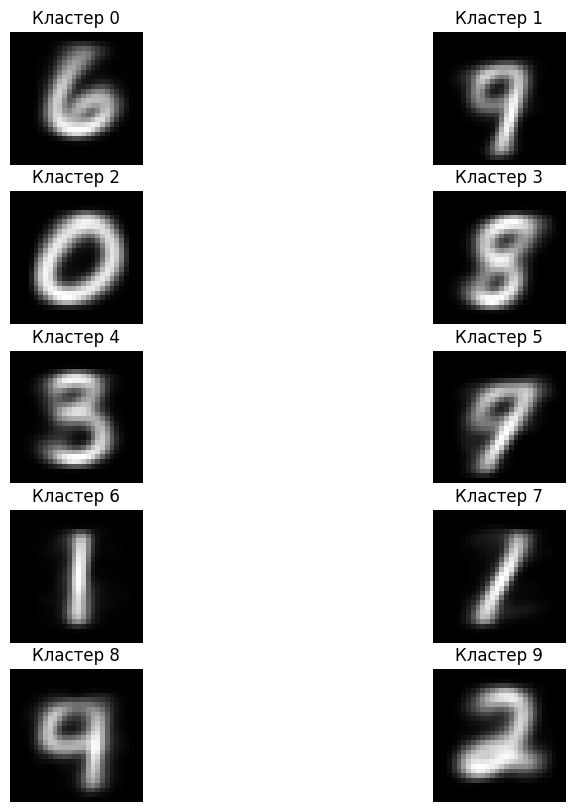

In [ ]:
import matplotlib.pyplot as plt
# Визуализация центроидов как изображений
centroids = kmeans.cluster_centers_.reshape(num_clusters, 28, 28)
plt.figure(figsize=(10, 10))
for i in range(num_clusters):
    plt.subplot(5, 2, i + 1)
    plt.imshow(centroids[i], cmap='gray')
    plt.title(f'Кластер {i}')
    plt.axis('off')
plt.show()


Применение иерархической кластеризации

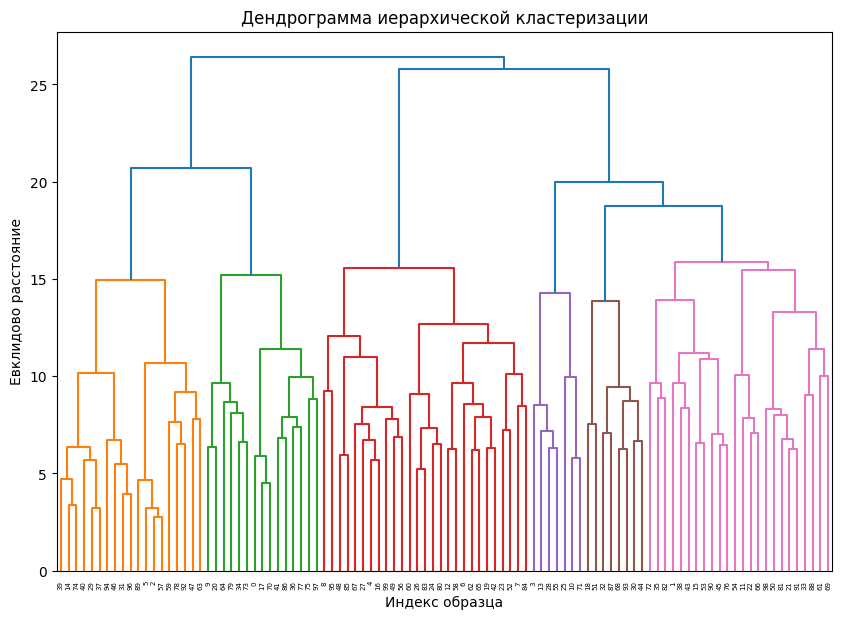

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Применение иерархической кластеризации
# Использование 'ward' метода как критерий связи для минимизации дисперсии внутри кластеров
Z = linkage(images[:100], method='ward')  # Ограничение количества образцов для ускорения

# Построение дендрограммы
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Дендрограмма иерархической кластеризации')
plt.xlabel('Индекс образца')
plt.ylabel('Евклидово расстояние')
plt.show()


In [ ]:
from scipy.cluster.hierarchy import fcluster

# Выбор количества кластеров на основе дендрограммы
k = 10

# Получение меток кластеров
clusters = fcluster(Z, k, criterion='maxclust')

# Вывод результатов
print("Присвоенные кластеры:", clusters)


Присвоенные кластеры: [ 3  8  1  6  4  1  5  5  4  2  6  9  5  6  1  8  4  3  7  5  2 10  9  5
  5  6  5  4  6  1  7  1  7 10  2  8  3  1  8  1  1  3  5  8  7  8  1  1
  4  4 10  7  5  8  9  6  4  1  5  1  5 10  5  1  2  5  9  4  7 10  3  6
  8  2  1  3  8  3  1  2  5 10  8  5  5  4  3  7 10  1  8 10  1  7  1  4
  1  3 10  4]


задание 3

Вычисление интеркластерных расстояний

Будем использовать уже вычисленную матрицу связей Z, полученную на предыдущем этапе.

Построение кривой

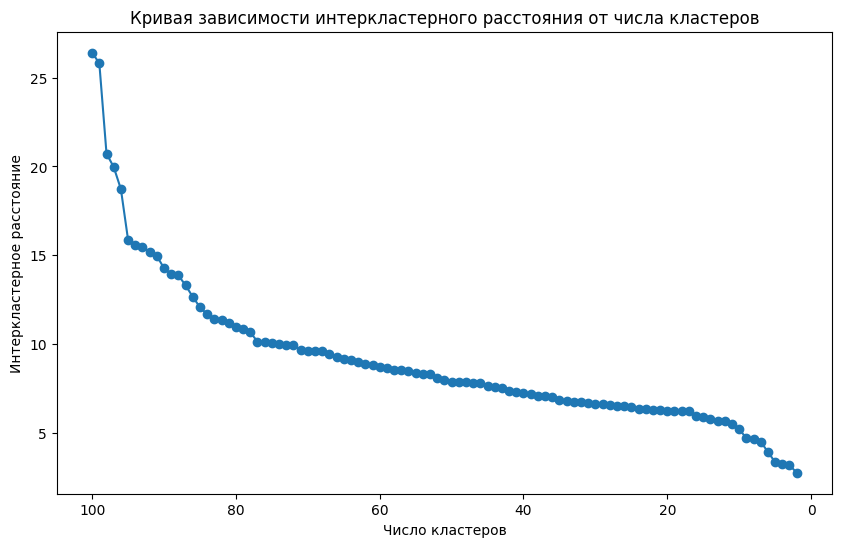

In [ ]:
# Извлечение расстояний из матрицы Z

distances = Z[:, 2]

num_points = len(Z) + 2

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(range(num_points-1, 1, -1), distances[::-1], marker='o')
plt.title('Кривая зависимости интеркластерного расстояния от числа кластеров')
plt.xlabel('Число кластеров')
plt.ylabel('Интеркластерное расстояние')
plt.gca().invert_xaxis()
plt.show()


Сравнение результатов кластеризации

In [ ]:
from sklearn.metrics import silhouette_score
Z = linkage(images, 'ward')
# Вычисление силуэтного коэффициента для K-means
silhouette_kmeans = silhouette_score(images, kmeans.labels_)

# Для иерархической кластеризации, нам нужно сначала получить метки кластеров при оптимальном пороге
optimal_clusters = 10
clusters_hierarchical = fcluster(Z, optimal_clusters, criterion='maxclust')

# Вычисление силуэтного коэффициента для иерархической кластеризации
silhouette_hierarchical = silhouette_score(images, clusters_hierarchical)

print(f"Силуэтный коэффициент для K-means: {silhouette_kmeans}")
print(f"Силуэтный коэффициент для иерархической кластеризации: {silhouette_hierarchical}")


Силуэтный коэффициент для K-means: 0.05906953290104866
Силуэтный коэффициент для иерархической кластеризации: 0.03852371498942375


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Предобработка данных: масштабирование признаков
scaler = StandardScaler()
images_scaled = scaler.fit_transform(images)

# Применение DBSCAN

dbscan = DBSCAN(eps=70, min_samples=4)
clusters_dbscan = dbscan.fit_predict(images_scaled)

# Оценка качества кластеризации
# Метка -1 обозначает шум в DBSCAN, мы не включаем эти точки в оценку силуэтного коэффициента
if len(set(clusters_dbscan)) > 1:  # Убедимся, что есть больше одного кластера кроме шума
    silhouette_dbscan = silhouette_score(images_scaled, clusters_dbscan)
else:
    silhouette_dbscan = -1

print(f"Силуэтный коэффициент для DBSCAN: {silhouette_dbscan}")


Силуэтный коэффициент для DBSCAN: 0.7416591048240662
